In [280]:
## 필요 라이브러리 등록
import numpy as np
import pandas as pd
import seaborn as sns

In [323]:
# 한글 깨짐 문제 해결
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)
rcParams['axes.unicode_minus'] = False

In [282]:
busan_crime22 = pd.read_csv('./data/22년경찰청 부산광역시경찰청_경찰서별 5대 범죄 발생 현황_20230410.csv',encoding = 'utf-8')
busan_crime21 = pd.read_csv('./data/21년경찰청 부산광역시경찰청-경찰서별 5대 범죄 발생 현황.csv',encoding = 'utf-8')

busan_crime22.head()

,연번,경찰서,구분,살인,강도,성범죄,절도,폭력
0,1,중부,경찰서,0,4,38,540,578
1,2,동래,경찰서,1,1,99,725,964
2,3,영도,경찰서,3,1,19,295,510
3,4,동부,경찰서,1,3,41,469,595
4,5,부산진,경찰서,6,3,222,1989,2318


In [283]:
busan_crime21.head()

,연번,경찰서,구분,살인,강도,성범죄,절도,폭력
0,1,중부,경찰서,3,2,30,583,565
1,2,동래,경찰서,2,1,99,922,1124
2,3,영도,경찰서,4,1,51,299,512
3,4,동부,경찰서,2,0,36,478,656
4,5,부산진,경찰서,2,5,256,2177,2614


In [284]:
busan_crime22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      15 non-null     int64 
 1   경찰서     15 non-null     object
 2   구분      15 non-null     object
 3   살인      15 non-null     int64 
 4   강도      15 non-null     int64 
 5    성범죄    15 non-null     int64 
 6   절도      15 non-null     int64 
 7   폭력      15 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.1+ KB


In [285]:
busan_crime22['합계'] = busan_crime22['살인']+busan_crime22['강도']+busan_crime22[' 성범죄']+busan_crime22['절도']+busan_crime22['폭력']

del busan_crime22['연번']
del busan_crime22['구분']

busan_crime22.head()

,경찰서,살인,강도,성범죄,절도,폭력,합계
0,중부,0,4,38,540,578,1160
1,동래,1,1,99,725,964,1790
2,영도,3,1,19,295,510,828
3,동부,1,3,41,469,595,1109
4,부산진,6,3,222,1989,2318,4538


In [286]:
busan_crime21['합계'] = busan_crime21['살인']+busan_crime21['강도']+busan_crime21[' 성범죄']+busan_crime21['절도']+busan_crime21['폭력']

del busan_crime21['연번']
del busan_crime21['구분']

busan_crime21.head()

,경찰서,살인,강도,성범죄,절도,폭력,합계
0,중부,3,2,30,583,565,1183
1,동래,2,1,99,922,1124,2148
2,영도,4,1,51,299,512,867
3,동부,2,0,36,478,656,1172
4,부산진,2,5,256,2177,2614,5054


In [287]:
busan_crime22.columns

Index(['경찰서', '살인', '강도', ' 성범죄', '절도', '폭력', '합계'], dtype='object')

In [288]:
busan_crime22 = busan_crime22.set_index('경찰서')
busan_crime22

,살인,강도,성범죄,절도,폭력,합계
경찰서,,,,,,
중부,0,4,38,540,578,1160
동래,1,1,99,725,964,1790
영도,3,1,19,295,510,828
동부,1,3,41,469,595,1109
부산진,6,3,222,1989,2318,4538
서부,2,1,25,454,440,922
남부,3,3,105,887,1405,2403
해운대,3,6,153,1333,1531,3026
사상,6,1,81,841,1003,1932


In [289]:
busan_crime21 = busan_crime21.set_index('경찰서')
busan_crime21

,살인,강도,성범죄,절도,폭력,합계
경찰서,,,,,,
중부,3,2,30,583,565,1183
동래,2,1,99,922,1124,2148
영도,4,1,51,299,512,867
동부,2,0,36,478,656,1172
부산진,2,5,256,2177,2614,5054
서부,1,2,30,414,625,1072
남부,4,6,161,1194,1638,3003
해운대,4,10,162,1238,1585,2999
사상,4,7,88,948,1070,2117


In [290]:
crime_sum = busan_crime21['합계'] + busan_crime22['합계']

In [291]:
crime_sum = pd.DataFrame(crime_sum)
crime_sum

,합계
경찰서,
중부,2343
동래,3938
영도,1695
동부,2281
부산진,9592
서부,1994
남부,5406
해운대,6025
사상,4049


<Axes: xlabel='경찰서'>

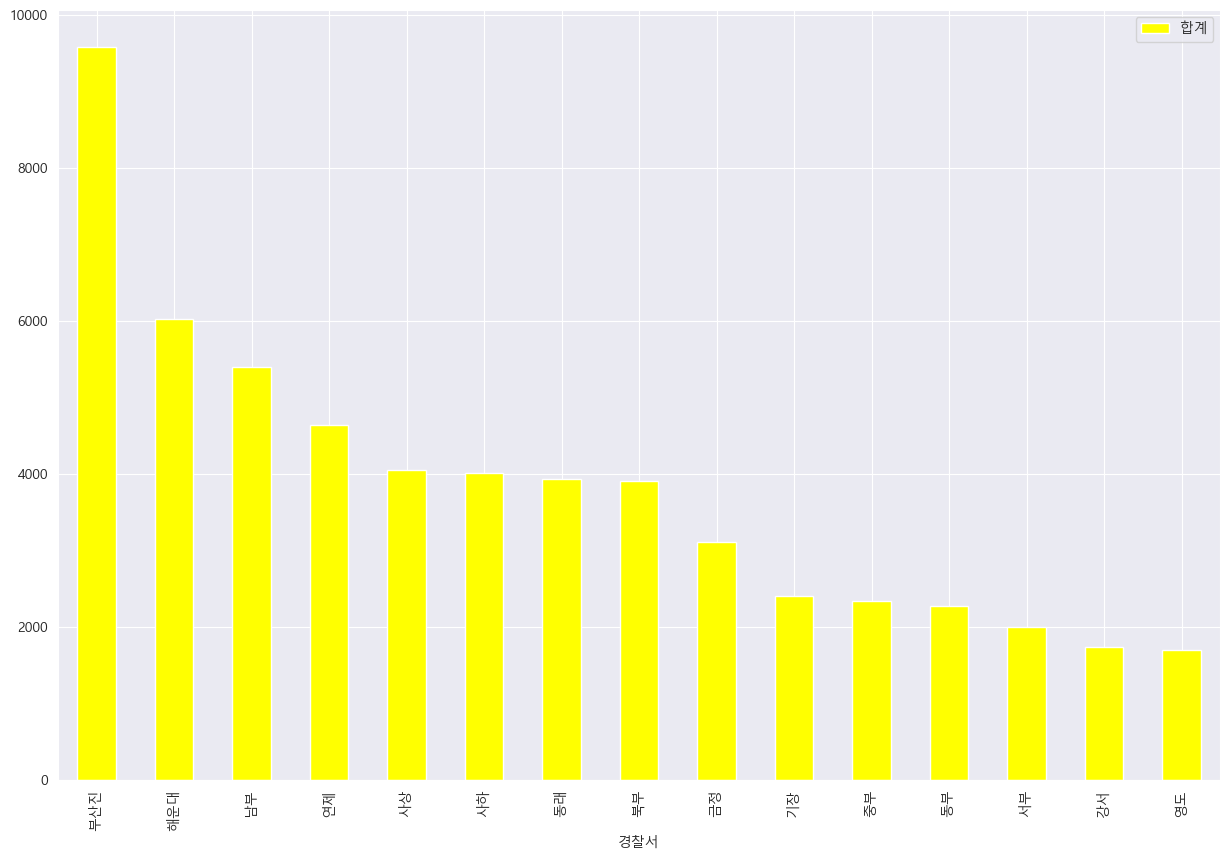

In [292]:
crime_sort = crime_sum.sort_values('합계', ascending=False)
crime_sort.plot.bar(figsize=(15,10),color = 'yellow')

In [293]:
crime_murder = busan_crime21['살인'] + busan_crime22['살인']
crime_murder = pd.DataFrame(crime_murder)
crime_murder

,살인
경찰서,
중부,3
동래,3
영도,7
동부,3
부산진,8
서부,3
남부,7
해운대,7
사상,10


In [294]:
crime_robber = busan_crime21['강도'] + busan_crime22['강도']
crime_robber = pd.DataFrame(crime_robber)
crime_robber

,강도
경찰서,
중부,6
동래,2
영도,2
동부,3
부산진,8
서부,3
남부,9
해운대,16
사상,8


In [295]:
crime_sex = busan_crime21[' 성범죄'] + busan_crime22[' 성범죄']
crime_sex = pd.DataFrame(crime_sex)
crime_sex

,성범죄
경찰서,
중부,68
동래,198
영도,70
동부,77
부산진,478
서부,55
남부,266
해운대,315
사상,169


In [296]:
crime_violence = busan_crime21['폭력'] + busan_crime22['폭력']
crime_violence = pd.DataFrame(crime_violence)
crime_violence

,폭력
경찰서,
중부,1143
동래,2088
영도,1022
동부,1251
부산진,4932
서부,1065
남부,3043
해운대,3116
사상,2073


In [297]:
crime_theft = busan_crime21['절도'] + busan_crime22['절도']
crime_theft = pd.DataFrame(crime_theft)
crime_theft

,절도
경찰서,
중부,1123
동래,1647
영도,594
동부,947
부산진,4166
서부,868
남부,2081
해운대,2571
사상,1789


In [298]:
merge_1 = pd.merge(crime_murder,crime_robber, on='경찰서')
merge_2 = pd.merge(crime_sex,crime_violence, on='경찰서')
merge_3 = pd.merge(merge_1, merge_2, on='경찰서')
merge_4 = pd.merge(crime_theft, crime_sum, on = '경찰서')
result = pd.merge(merge_3, merge_4, on='경찰서')
result

,살인,강도,성범죄,폭력,절도,합계
경찰서,,,,,,
중부,3,6,68,1143,1123,2343
동래,3,2,198,2088,1647,3938
영도,7,2,70,1022,594,1695
동부,3,3,77,1251,947,2281
부산진,8,8,478,4932,4166,9592
서부,3,3,55,1065,868,1994
남부,7,9,266,3043,2081,5406
해운대,7,16,315,3116,2571,6025
사상,10,8,169,2073,1789,4049


In [299]:
districts = ['중부','동래','영도','동부','부산진','서부','남부','해운대','사상','금정','사하','연제','강서','북부','기장']
result['관할구'] = districts #경찰서 별 관할구 추가
by_district = result.groupby('관할구') #경찰서 별에서 관할구 별 범죄발생 테이블로 변경
district_crime = by_district.sum()
district_crime.head()

,살인,강도,성범죄,폭력,절도,합계
관할구,,,,,,
강서,3,4,72,979,674,1732
금정,8,7,145,1500,1453,3113
기장,3,1,94,1275,1027,2400
남부,7,9,266,3043,2081,5406
동래,3,2,198,2088,1647,3938


In [300]:
# 라이브러리 추가
from sklearn import preprocessing

In [301]:
# 범죄별 빈도가 다르기 때문에 0~1의 범위로 놓고 비교 각 항목의 최댓값은 1 최소값은 0
col = ['살인','강도',' 성범죄','폭력','절도']
x = district_crime[col].values
scaler = preprocessing.MinMaxScaler()
x_scaled =  scaler.fit_transform(x.astype(float))
crime_norm = pd.DataFrame(x_scaled, columns = col, index = district_crime.index)
crime_norm

,살인,강도,성범죄,폭력,절도
관할구,,,,,
강서,0.000000,0.200000,0.040189,0.000000,0.022396
금정,0.714286,0.400000,0.212766,0.131799,0.240482
기장,0.000000,0.000000,0.092199,0.074880,0.121221
남부,0.571429,0.533333,0.498818,0.522135,0.416293
동래,0.000000,0.066667,0.338061,0.280546,0.294793
동부,0.000000,0.133333,0.052009,0.068808,0.098824
부산진,0.714286,0.466667,1.000000,1.000000,1.000000
북부,0.428571,0.466667,0.163121,0.233999,0.355823
사상,1.000000,0.466667,0.269504,0.276752,0.334546


<Axes: xlabel='관할구'>

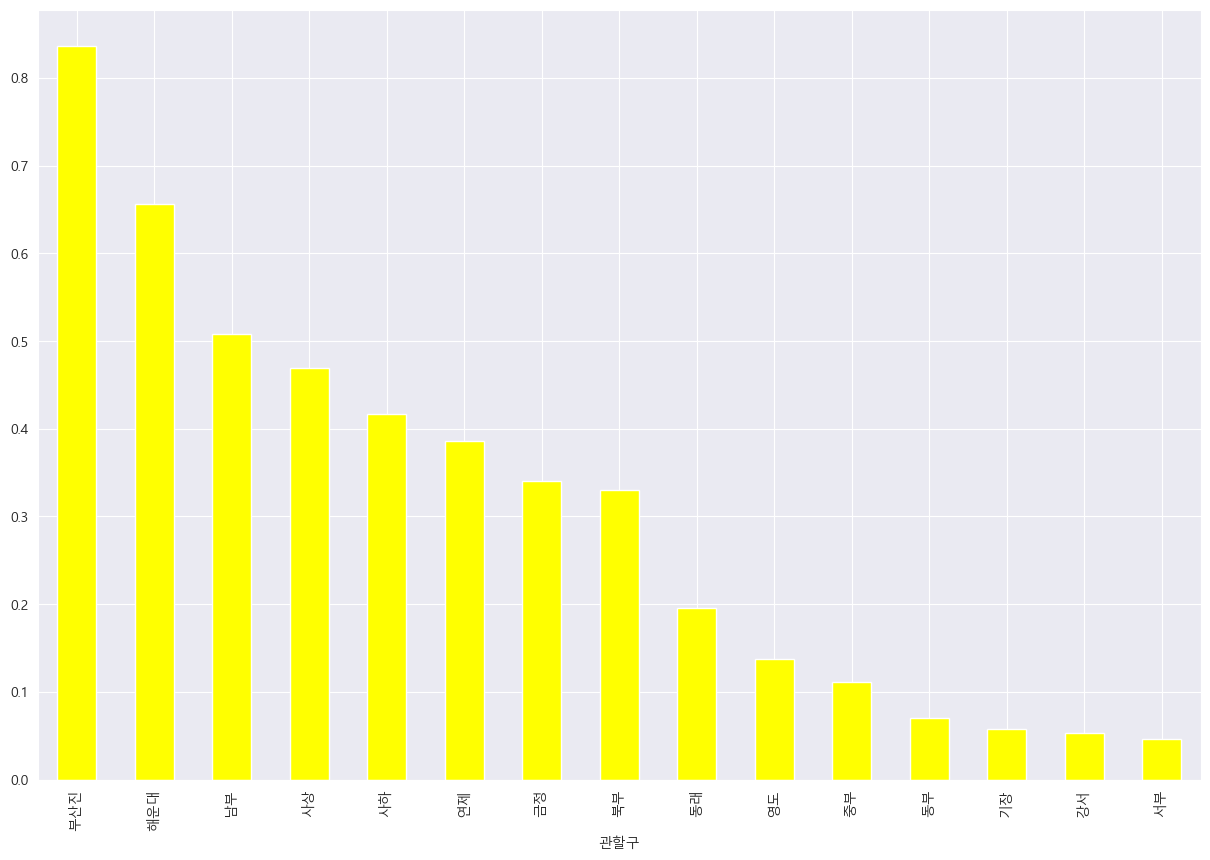

In [302]:
#5대범죄 막대그래프로 비교
crime_norm['5대범죄'] = np.sum(crime_norm[col],axis=1) / 5
crime_sort = crime_norm.sort_values('5대범죄', ascending=False)
crime_sort = crime_sort.iloc[:,5]
crime_sort.plot.bar(figsize=(15,10), color = 'yellow')

In [303]:
# 추가 라이브러리
import matplotlib.pyplot as plt

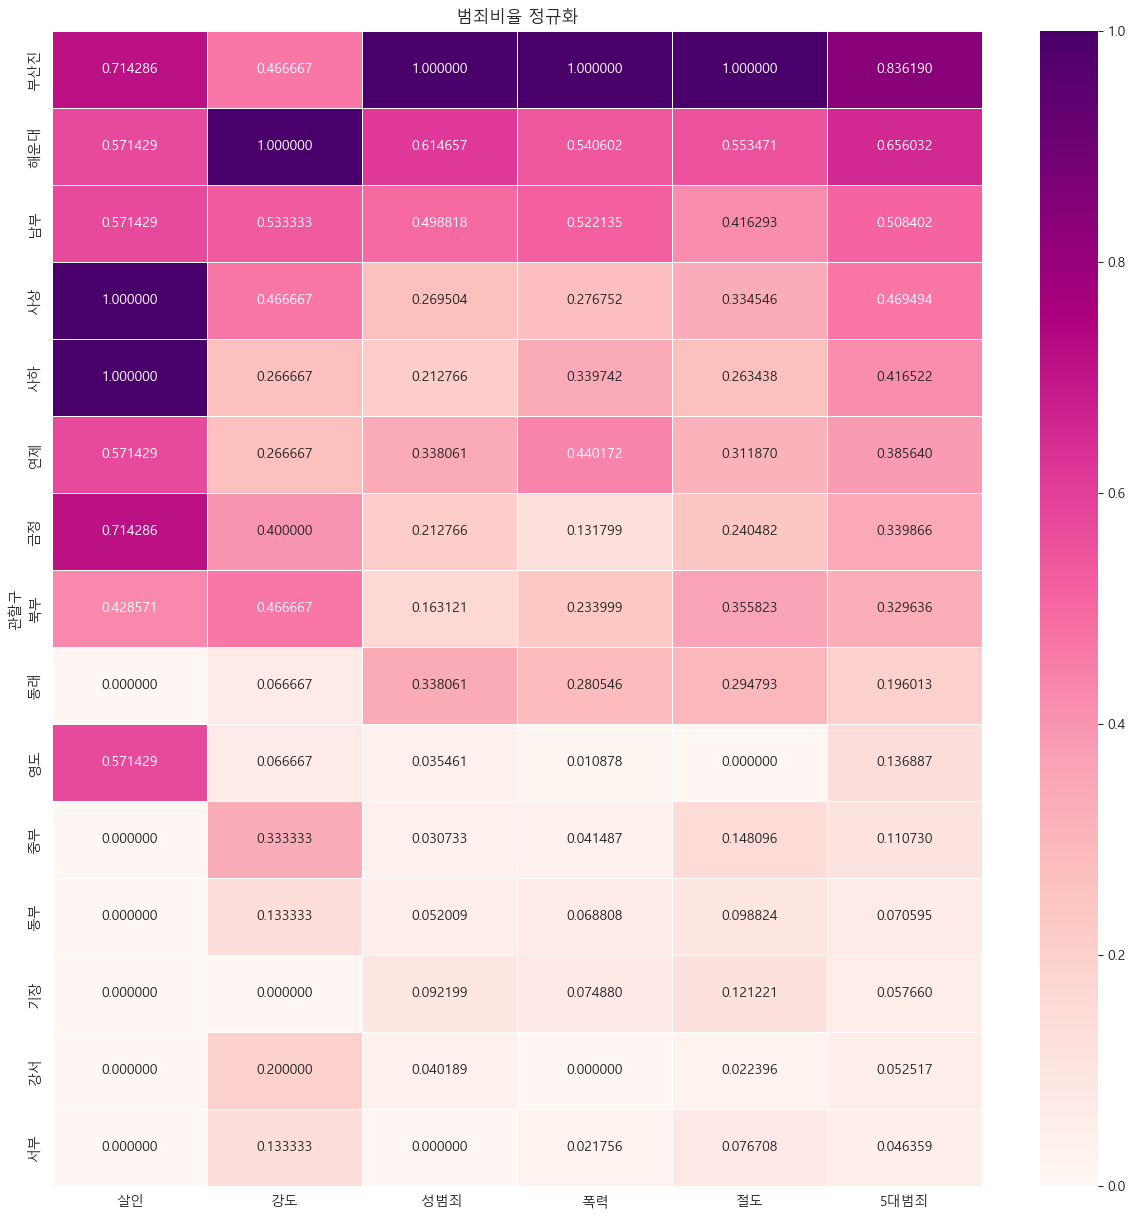

In [304]:
crime_norm['5대범죄'] = np.sum(crime_norm[col],axis=1) / 5
col.append('5대범죄')
crime_norm_sort = crime_norm.sort_values(by='5대범죄', ascending=False)
plt.figure(figsize=(15,15))

sns.heatmap(crime_norm_sort[col], annot=True, fmt='f', linewidth=.5 , cmap='RdPu')
plt.title('범죄비율 정규화')
plt.show()

In [305]:
crime21 = pd.DataFrame(np.sum(busan_crime21, axis=0))
crime22 = pd.DataFrame(np.sum(busan_crime22, axis=0))

In [306]:
crime_category = pd.concat([crime21,crime22], axis=1)
crime_category.columns=['2021','2022']
crime_category

,2021,2022
살인,46,42
강도,51,36
성범죄,1338,1136
절도,12670,11378
폭력,16094,14338
합계,30199,26930


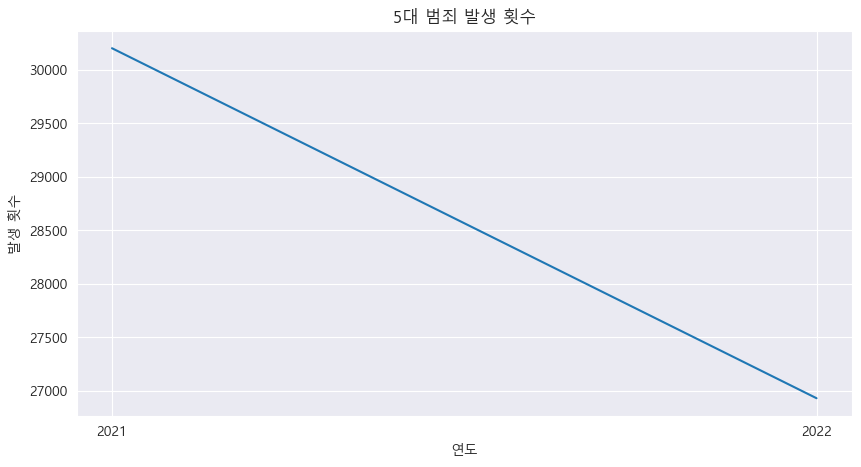

In [307]:
plt.figure(figsize=(10,5))
plt.plot(crime_category.iloc[5,:])
plt.xlabel('연도')
plt.ylabel('발생 횟수')
plt.title('5대 범죄 발생 횟수')
plt.show()

Text(0.5, 1.0, '폭력 발생 횟수')

C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  func(*args, **kwargs)
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  func(*args, **kwargs)
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from current font.
  func(*args, **kwargs)
C:

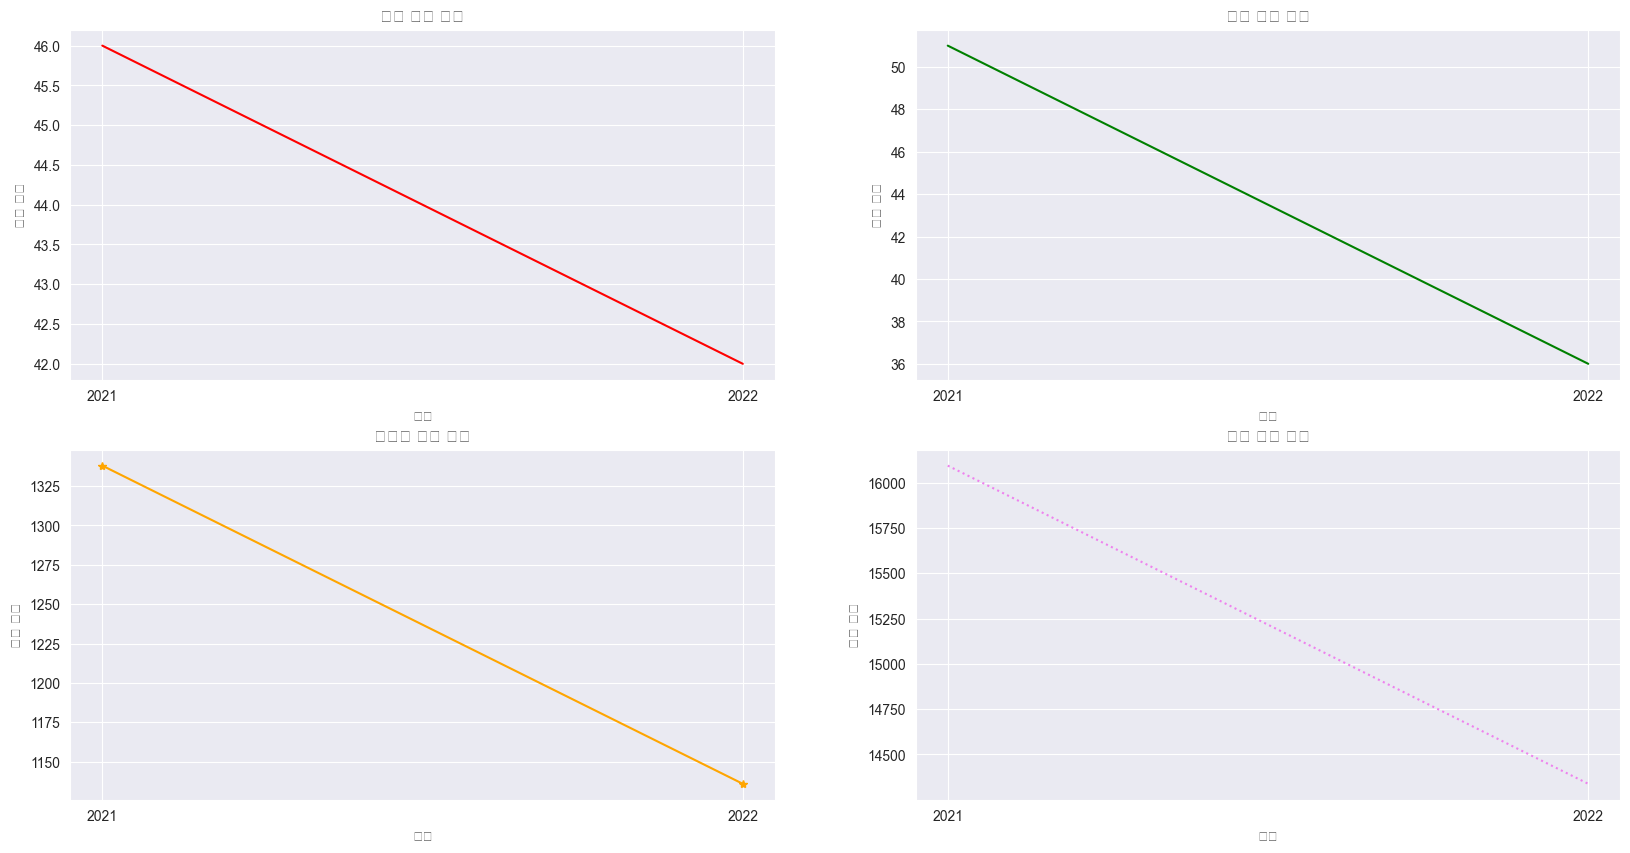

In [308]:
from turtle import color
sns.set_style('darkgrid')


plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.plot(crime_category.iloc[0,:],color='red')
plt.xlabel('연도')
plt.ylabel('발생 횟수')
plt.title('살인 발생 횟수')

plt.subplot(2,2,2)
plt.plot(crime_category.iloc[1,:],color='green')
plt.xlabel('연도')
plt.ylabel('발생 횟수')
plt.title('강도 발생 횟수')

plt.subplot(2,2,3)
plt.plot(crime_category.iloc[2,:],color='orange', marker='*')
plt.xlabel('연도')
plt.ylabel('발생 횟수')
plt.title('성범죄 발생 횟수')

plt.subplot(2,2,4)
plt.plot(crime_category.iloc[4,:],color='violet', linestyle=':')
plt.xlabel('연도')
plt.ylabel('발생 횟수')
plt.title('폭력 발생 횟수')

In [309]:
# 주차장
parking_df_all =pd.read_csv('./data/myfile.csv',encoding = 'utf-8')
# parking_df_all['관리기관명'] = parking_df_all['관리기관명'].str.split(' ').str.get(1)
parking_df = parking_df_all[parking_df_all['관리기관명'] =='부산광역시 부산진구청'].reset_index(drop=True)
parking_df.head()

,운영형태,관리기관명,주차장명,주차장관리번호,소재지지번주소,소재지도로명주소,전화번호,주차장유형,주차구획수,평일운영시작시각,...,부제시행구분,운영요일,요금정보,주차기본시간,추가단위시간,추가단위요금,1일주차권요금적용시간,결제방법,특기사항,실시간주차면수
0,민간위탁,부산광역시 부산진구청,네오스포밑,2008011647,-,부산진구 부전2동 560-5,010-2269-3006,노상,38,08:00,...,-,-,-,10,10,300,-,-,-,-
1,민간위탁,부산광역시 부산진구청,부전복개도로,2008011648,-,부산진구 부전2동 575,010-3708-2505,노상,20,09:00,...,-,-,-,10,10,700,-,-,-,-
2,민간위탁,부산광역시 부산진구청,적십자회관,2008011649,-,부산진구 전포2동 865,010-2269-3006,노상,51,08:00,...,-,-,-,10,10,300,-,-,-,-
3,민간위탁,부산광역시 부산진구청,평화시장,2009000008,-,부산진구 범천1동 839-4,-,노상,23,-,...,-,-,-,10,10,300,-,-,-,-
4,구(군)직영,부산광역시 부산진구청,백양순환로 시간제 노상주차장,2010000007,-,부산진구 당감4동 649-34 백양순환로,-,노상,59,-,...,-,-,-,10,10,0,-,-,-,-


In [310]:
for i in range(57):
    if parking_df['소재지도로명주소'][i] == '-':
        parking_df['소재지도로명주소'][i] = parking_df['소재지지번주소'][i]
parking_df


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5368\4132811581.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  parking_df['소재지도로명주소'][i] = parking_df['소재지지번주소'][i]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5368\4132811581.

,운영형태,관리기관명,주차장명,주차장관리번호,소재지지번주소,소재지도로명주소,전화번호,주차장유형,주차구획수,평일운영시작시각,...,부제시행구분,운영요일,요금정보,주차기본시간,추가단위시간,추가단위요금,1일주차권요금적용시간,결제방법,특기사항,실시간주차면수
0,민간위탁,부산광역시 부산진구청,네오스포밑,2008011647,-,부산진구 부전2동 560-5,010-2269-3006,노상,38,08:00,...,-,-,-,10,10,300,-,-,-,-
1,민간위탁,부산광역시 부산진구청,부전복개도로,2008011648,-,부산진구 부전2동 575,010-3708-2505,노상,20,09:00,...,-,-,-,10,10,700,-,-,-,-
2,민간위탁,부산광역시 부산진구청,적십자회관,2008011649,-,부산진구 전포2동 865,010-2269-3006,노상,51,08:00,...,-,-,-,10,10,300,-,-,-,-
3,민간위탁,부산광역시 부산진구청,평화시장,2009000008,-,부산진구 범천1동 839-4,-,노상,23,-,...,-,-,-,10,10,300,-,-,-,-
4,구(군)직영,부산광역시 부산진구청,백양순환로 시간제 노상주차장,2010000007,-,부산진구 당감4동 649-34 백양순환로,-,노상,59,-,...,-,-,-,10,10,0,-,-,-,-
5,구(군)직영,부산광역시 부산진구청,테마공원로 시간제 노상주차장,2010000008,-,부산진구 개금3동 60-1 테마공원로,-,노상,34,-,...,-,-,-,10,10,0,-,-,-,-
6,민간위탁,부산광역시 부산진구청,가남공영(주거지전용)주차장,2010000013,-,부산진구 가야1동 8-6,-,노외,71,-,...,-,-,-,10,10,100,-,-,-,-
7,민간위탁,부산광역시 부산진구청,범천4동 소규모공동주차장,2010000014,-,부산진구 범천2동 1127-9,-,노외,11,-,...,-,-,-,10,10,100,-,-,-,-
8,민간위탁,부산광역시 부산진구청,금호천지맨션 뒤,2010000015,-,부산진구 부암3동 411-3,-,노외,7,-,...,-,-,-,10,10,0,-,-,-,-
9,민간위탁,부산광역시 부산진구청,큰별유치원 뒤,2010000016,-,부산진구 개금3동 419-7,-,노외,13,-,...,-,-,-,10,10,100,-,-,-,-


In [311]:
parking_df=parking_df[['주차장명','소재지도로명주소']]
parking_df

,주차장명,소재지도로명주소
0,네오스포밑,부산진구 부전2동 560-5
1,부전복개도로,부산진구 부전2동 575
2,적십자회관,부산진구 전포2동 865
3,평화시장,부산진구 범천1동 839-4
4,백양순환로 시간제 노상주차장,부산진구 당감4동 649-34 백양순환로
5,테마공원로 시간제 노상주차장,부산진구 개금3동 60-1 테마공원로
6,가남공영(주거지전용)주차장,부산진구 가야1동 8-6
7,범천4동 소규모공동주차장,부산진구 범천2동 1127-9
8,금호천지맨션 뒤,부산진구 부암3동 411-3
9,큰별유치원 뒤,부산진구 개금3동 419-7


In [312]:
parking_df.rename(columns={'주차장명':'구분','소재지도로명주소':"도로명주소"},inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5368\2471247350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parking_df.rename(columns={'주차장명':'구분','소재지도로명주소':"도로명주소"},inplace=True)


In [313]:
parking_df['구분']='주차장'
parking_df

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5368\745887619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parking_df['구분']='주차장'


,구분,도로명주소
0,주차장,부산진구 부전2동 560-5
1,주차장,부산진구 부전2동 575
2,주차장,부산진구 전포2동 865
3,주차장,부산진구 범천1동 839-4
4,주차장,부산진구 당감4동 649-34 백양순환로
5,주차장,부산진구 개금3동 60-1 테마공원로
6,주차장,부산진구 가야1동 8-6
7,주차장,부산진구 범천2동 1127-9
8,주차장,부산진구 부암3동 411-3
9,주차장,부산진구 개금3동 419-7


In [314]:
parking_df.drop(index=[28,29,31,32,33,34,35,36,37,38],inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5368\2181796905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parking_df.drop(index=[28,29,31,32,33,34,35,36,37,38],inplace=True)


In [315]:
parking_df = parking_df.reset_index(drop=True)
parking_df

,구분,도로명주소
0,주차장,부산진구 부전2동 560-5
1,주차장,부산진구 부전2동 575
2,주차장,부산진구 전포2동 865
3,주차장,부산진구 범천1동 839-4
4,주차장,부산진구 당감4동 649-34 백양순환로
5,주차장,부산진구 개금3동 60-1 테마공원로
6,주차장,부산진구 가야1동 8-6
7,주차장,부산진구 범천2동 1127-9
8,주차장,부산진구 부암3동 411-3
9,주차장,부산진구 개금3동 419-7


In [316]:
# 구글맵스 설치
!pip install googlemaps

In [317]:
# 구글 맵스 인증키 생성
import googlemaps

gmaps_key = ''
gmaps = googlemaps.Client(key=gmaps_key)

In [318]:
#지도 시각화 도구
import folium
map=folium.Map(location=[35.15472391,129.0596437],zoom_start=13)
map

In [319]:
for apt in parking_df['도로명주소']:

  parking_ad = apt.replace(" ","")
  tmpMap = gmaps.geocode(parking_ad, language='ko')
  print(tmpMap)

[{'address_components': [{'long_name': '560-5', 'short_name': '560-5', 'types': ['premise']}, {'long_name': '부전동', 'short_name': '부전동', 'types': ['political', 'sublocality', 'sublocality_level_2']}, {'long_name': '부산진구', 'short_name': '부산진구', 'types': ['political', 'sublocality', 'sublocality_level_1']}, {'long_name': '부산광역시', 'short_name': '부산광역시', 'types': ['administrative_area_level_1', 'political']}, {'long_name': '대한민국', 'short_name': 'KR', 'types': ['country', 'political']}, {'long_name': '47283', 'short_name': '47283', 'types': ['postal_code']}], 'formatted_address': '대한민국 부산광역시 부산진구 부전동 560-5', 'geometry': {'location': {'lat': 35.1530488, 'lng': 129.054165}, 'location_type': 'ROOFTOP', 'viewport': {'northeast': {'lat': 35.1543977802915, 'lng': 129.0555139802915}, 'southwest': {'lat': 35.1516998197085, 'lng': 129.0528160197085}}}, 'place_id': 'ChIJEfVAsnbraDURsVVOKkLzoyg', 'plus_code': {'compound_code': '5333+6M 대한민국 부산광역시', 'global_code': '8Q7F5333+6M'}, 'types': ['street_addre

In [320]:
lat = []
lng = []

for apt in parking_df['도로명주소']:
  
  parking_ad = apt.replace(" ","")
  tmpMap = gmaps.geocode(parking_ad, language='ko')
  tmpLoc = tmpMap[0].get('geometry')
  lat.append(tmpLoc['location']['lat'])
  lng.append(tmpLoc['location']['lng'])


parking_df['lat']=lat
parking_df['lng']=lng

parking_df

,구분,도로명주소,lat,lng
0,주차장,부산진구 부전2동 560-5,35.153049,129.054165
1,주차장,부산진구 부전2동 575,35.153443,129.058853
2,주차장,부산진구 전포2동 865,35.161677,129.067575
3,주차장,부산진구 범천1동 839-4,35.141366,129.061351
4,주차장,부산진구 당감4동 649-34 백양순환로,35.167387,129.037714
5,주차장,부산진구 개금3동 60-1 테마공원로,35.159043,129.022952
6,주차장,부산진구 가야1동 8-6,35.150812,129.038071
7,주차장,부산진구 범천2동 1127-9,35.151790,129.048369
8,주차장,부산진구 부암3동 411-3,35.169040,129.041141
9,주차장,부산진구 개금3동 419-7,35.159043,129.022952


In [321]:
for n in parking_df.index:
    folium.CircleMarker([parking_df['lat'][n], parking_df['lng'][n]], color='orange', fill_color='orange').add_to(map)
map

In [327]:
cri_area=pd.read_csv('./data/crime_area.csv',encoding = 'utf-8')
cri_area

,범죄대분류,범죄중분류,"아파트,연립다세대",단독주택,고속도로,노상,백화점,슈퍼마켓,편의점,대형할인매장,...,종교기관,산야,해상,부대,구금장소,공지,주차장,공중화장실,피씨방,기타
0,강력범죄,살인기수,95,95,0,59,0,1,1,0,...,1,8,1,0,0,0,7,0,1,44
1,강력범죄,살인미수등,90,102,3,126,0,0,1,0,...,2,6,1,0,0,0,5,0,2,113
2,강력범죄,강도,138,182,2,423,0,26,154,1,...,6,4,0,0,0,0,44,2,6,263
3,강력범죄,강간,882,954,0,249,0,0,4,0,...,21,34,0,2,0,3,52,42,3,763
4,강력범죄,유사강간,68,63,0,30,0,0,0,0,...,1,1,0,0,0,0,12,11,1,66
5,강력범죄,강제추행,902,790,11,3324,9,66,158,13,...,39,26,1,5,3,2,110,66,43,3693
6,강력범죄,기타강간강제추행등,234,280,0,48,0,2,3,0,...,2,4,0,0,0,0,8,16,1,159
7,강력범죄,방화,261,321,1,210,2,4,1,2,...,16,11,1,0,0,0,47,24,2,545
8,절도범죄,절도,14333,19515,177,49527,1828,4718,4579,1966,...,1258,2705,40,34,1,94,11464,462,2987,85435
9,폭력범죄,상해,3373,3265,48,18320,33,110,218,28,...,124,200,20,14,4,15,873,46,78,11739


In [328]:
# 강력, 절도, 폭력범죄(16행까지)만 추출
cri_area_data = cri_area[:17] 

# '기타'열 제거
cri_area_data = cri_area_data.drop(['기타'],axis=1)

# 장소별 발생건수 Sum값 리스트화 시키기
list_sum = []
for i in cri_area_data:
    list_sum.append(cri_area_data[i].sum())
    list_sum = list_sum[1:]
    list_sum.insert(0,0)

# 마지막 행에 Sum값 추가
cri_area_data.loc['Sum'] = list_sum

Text(0.5, 1.0, '장소별 범죄 발생 횟수')

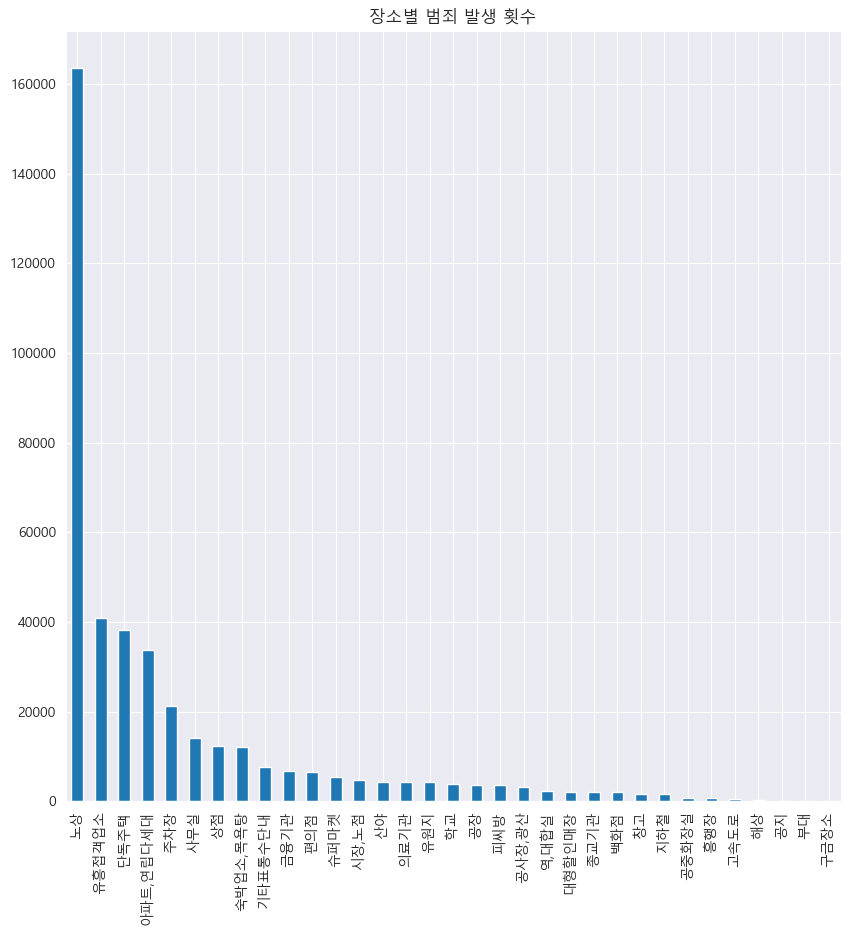

In [329]:
cri_area_sum = cri_area_data.loc['Sum']
cri_area_sum = cri_area_sum.iloc[2:]
cri_area_sum = cri_area_sum.sort_values(ascending=False)
cri_area_sum.plot.bar(figsize=(10, 10))
plt.title('장소별 범죄 발생 횟수')

In [330]:
cri_area_data = cri_area_data.groupby(['범죄대분류']).sum()
cri_area_data = cri_area_data.drop(index=0, axis=0)
cri_area_data

,범죄중분류,"아파트,연립다세대",단독주택,고속도로,노상,백화점,슈퍼마켓,편의점,대형할인매장,상점,...,의료기관,종교기관,산야,해상,부대,구금장소,공지,주차장,공중화장실,피씨방
범죄대분류,,,,,,,,,,,,,,,,,,,,,
강력범죄,살인기수살인미수등강도강간유사강간강제추행기타강간강제추행등방화,2670,2787,17,4469,11,99,322,16,277,...,242,88,94,4,7,3,5,285,161,59
절도범죄,절도,14333,19515,177,49527,1828,4718,4579,1966,9520,...,2077,1258,2705,40,34,1,94,11464,462,2987
폭력범죄,상해폭행체포감금협박약취유인폭력행위등공갈손괴,16774,15930,273,109581,139,595,1617,93,2554,...,1921,715,1587,153,74,20,59,9494,216,576


In [331]:
cri_area_data = cri_area_data.drop(['범죄중분류'], axis=1)


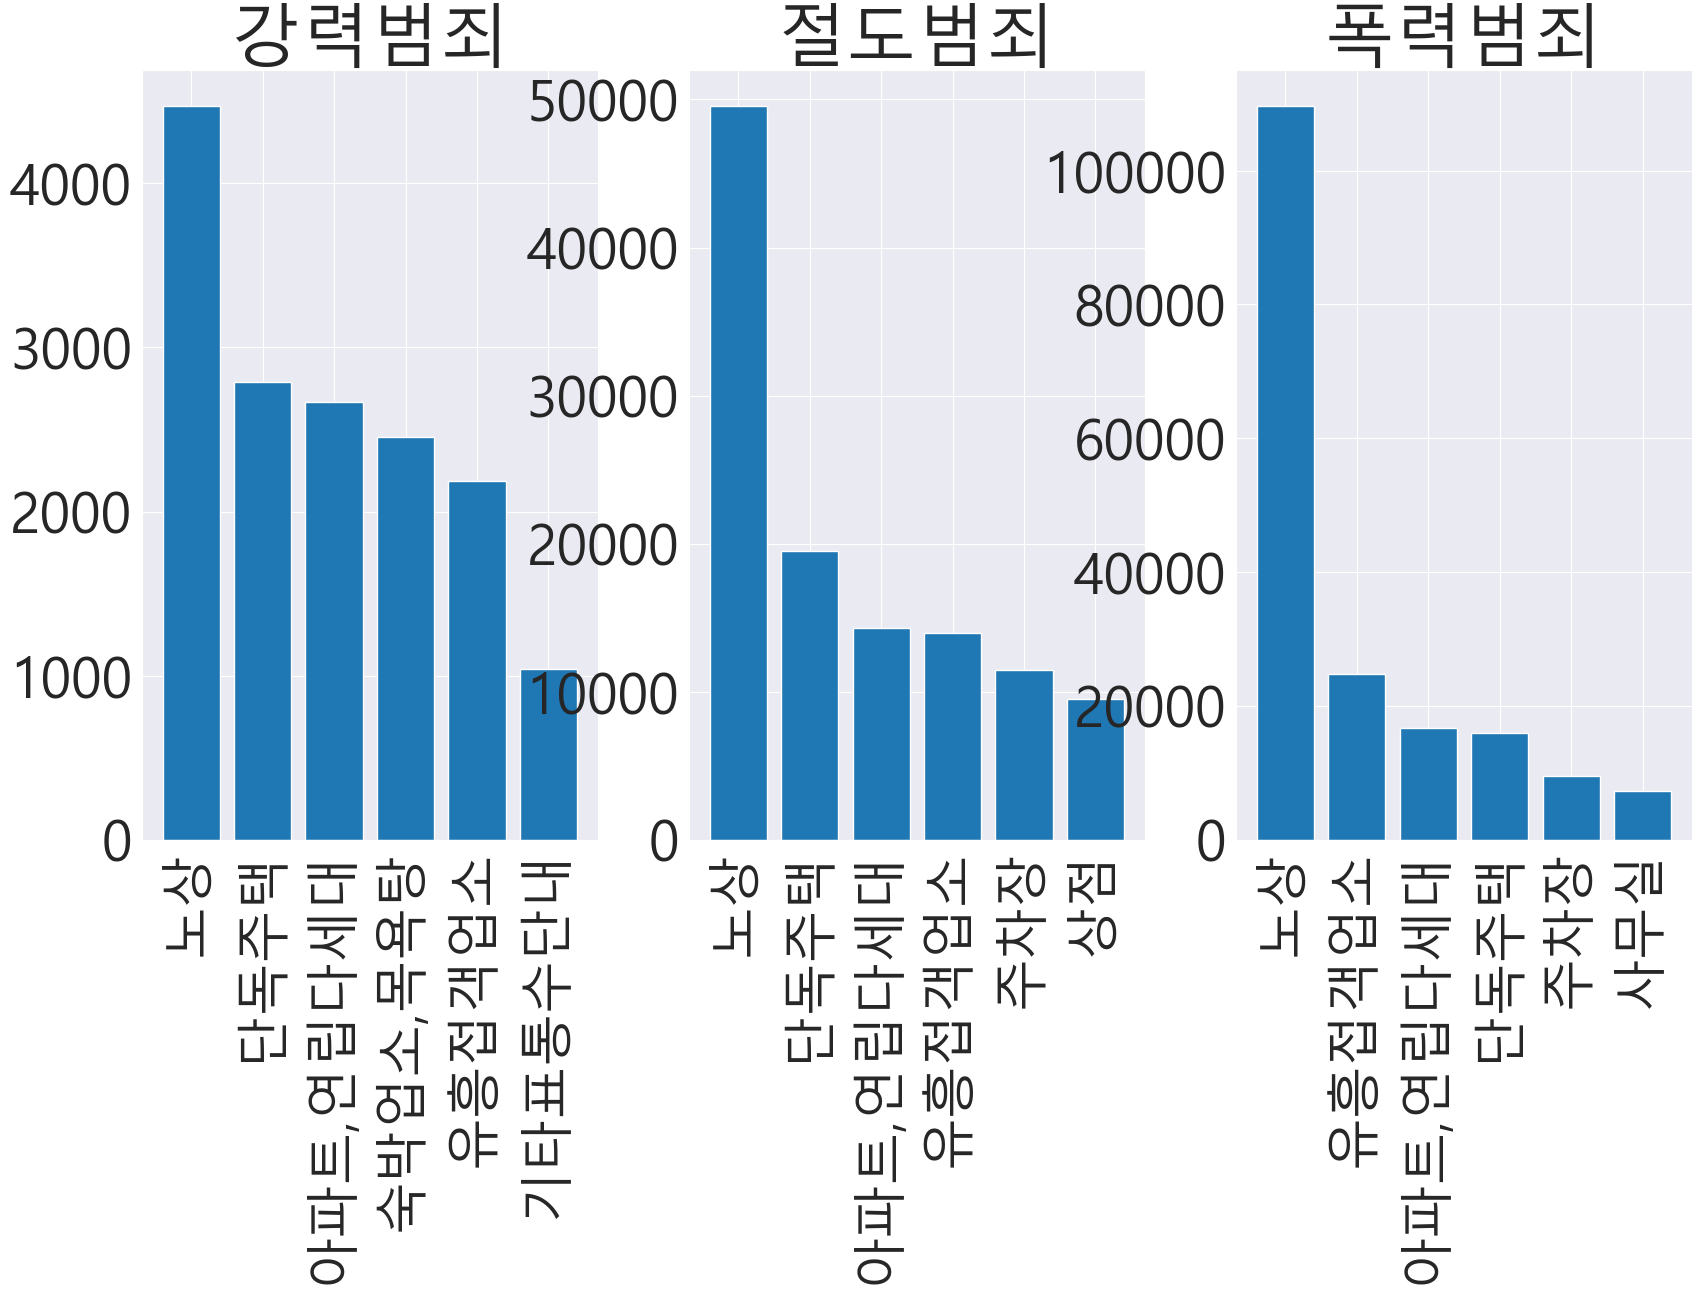

In [355]:
# 막대 그래프 그리기
n = 0
plt.figure(figsize=(20,10))
for i in range(len(cri_area_data.index)):
  n += 1
  a_list = cri_area_data.iloc[i].sort_values(ascending=False)
  top_6_a_list = a_list.nlargest(6)
  idx = list(top_6_a_list.index)
  val = top_6_a_list.values
  plt.subplot(1, 3, n)
  plt.bar(idx, val)
  plt.title(cri_area_data.index[i], fontsize=50)
  plt.xticks(rotation=90, fontsize=38)
  plt.yticks(fontsize=40)
plt.show()

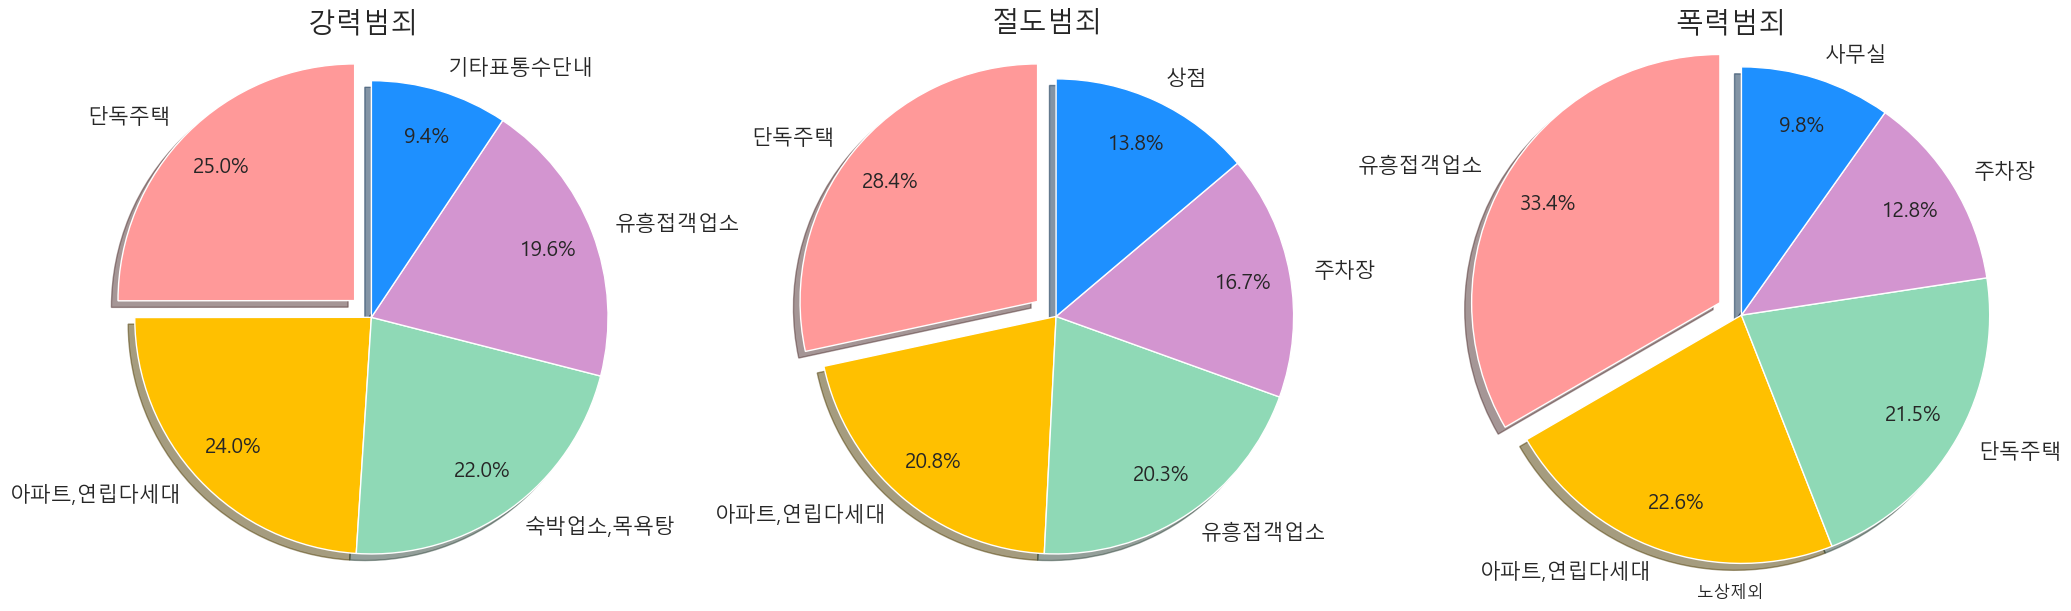

In [348]:
drop_ns = cri_area_data.drop(['노상'],axis=1)
fig, axs = plt.subplots(1, 3, figsize=(25,7))
for i in range(len(drop_ns.index)):
  a_list = drop_ns.iloc[i]
  a_list = a_list.sort_values(ascending=False)
  top_5_a_list = a_list.nlargest(5)
  ins = list(top_5_a_list.index)
  val = top_5_a_list.values
  ax = axs[i]
  explode = (0.1,0,0,0,0)
  colors = ('#ff9999','#ffc000','#8fd9b6','#d395d0','dodgerblue')
  ax.pie(val,labels = ins,autopct='%.1f%%', explode = explode, pctdistance=0.8, shadow=True, startangle=90,textprops = {'fontsize':15}, colors=colors)
  ax.axis('equal')
  ax.set_title(drop_ns.index[i],fontsize=20)